In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, recall_score, classification_report

**Importing the dataset**

In [ ]:
data = pd.read_csv("")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,...,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,2595.367818,-0.261963,0.280725,0.843124,0.089948,-0.003169,0.187788,0.019107,-0.041914,0.381580,...,-0.040136,-0.161438,-0.037555,0.028896,0.089814,-0.039693,0.026793,0.005637,65.100371,0.000513
std,1691.596663,1.393228,1.206192,1.024822,1.439625,1.186223,1.359345,1.062982,1.312675,1.044403,...,0.890170,0.647772,0.373349,0.619732,0.406480,0.489281,0.359668,0.258698,193.465557,0.022647
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1135.750000,-1.012439,-0.286978,0.294467,-0.853598,-0.609305,-0.681349,-0.490755,-0.190603,-0.271732,...,-0.258474,-0.594663,-0.187441,-0.348045,-0.151126,-0.400366,-0.049389,-0.017702,4.395000,0.000000
50%,2471.000000,-0.416942,0.343869,0.879825,0.147118,-0.087533,-0.150866,0.044800,0.037795,0.358471,...,-0.109719,-0.177561,-0.047120,0.095822,0.106658,-0.078699,0.016448,0.019429,15.690000,0.000000
75%,3766.000000,1.116368,0.935619,1.497673,1.057136,0.433545,0.599556,0.567276,0.340562,0.938599,...,0.062022,0.273355,0.087544,0.436471,0.354969,0.249251,0.156264,0.082578,56.705000,0.000000
max,6347.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


**check the Missing values**

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# Since it is not a Time series problem
data.drop("Time",axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5848 non-null   float64
 1   V2      5848 non-null   float64
 2   V3      5848 non-null   float64
 3   V4      5848 non-null   float64
 4   V5      5848 non-null   float64
 5   V6      5848 non-null   float64
 6   V7      5848 non-null   float64
 7   V8      5848 non-null   float64
 8   V9      5848 non-null   float64
 9   V10     5848 non-null   float64
 10  V11     5848 non-null   float64
 11  V12     5848 non-null   float64
 12  V13     5848 non-null   float64
 13  V14     5848 non-null   float64
 14  V15     5848 non-null   float64
 15  V16     5848 non-null   float64
 16  V17     5848 non-null   float64
 17  V18     5848 non-null   float64
 18  V19     5848 non-null   float64
 19  V20     5848 non-null   float64
 20  V21     5848 non-null   float64
 21  V22     5848 non-null   float64
 22  

In [ ]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,...,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,-0.261963,0.280725,0.843124,0.089948,-0.003169,0.187788,0.019107,-0.041914,0.381580,-0.104946,...,-0.040136,-0.161438,-0.037555,0.028896,0.089814,-0.039693,0.026793,0.005637,65.100371,0.000513
std,1.393228,1.206192,1.024822,1.439625,1.186223,1.359345,1.062982,1.312675,1.044403,0.988453,...,0.890170,0.647772,0.373349,0.619732,0.406480,0.489281,0.359668,0.258698,193.465557,0.022647
min,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,-6.042641,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,-1.012439,-0.286978,0.294467,-0.853598,-0.609305,-0.681349,-0.490755,-0.190603,-0.271732,-0.620869,...,-0.258474,-0.594663,-0.187441,-0.348045,-0.151126,-0.400366,-0.049389,-0.017702,4.395000,0.000000
50%,-0.416942,0.343869,0.879825,0.147118,-0.087533,-0.150866,0.044800,0.037795,0.358471,-0.174237,...,-0.109719,-0.177561,-0.047120,0.095822,0.106658,-0.078699,0.016448,0.019429,15.690000,0.000000
75%,1.116368,0.935619,1.497673,1.057136,0.433545,0.599556,0.567276,0.340562,0.938599,0.279768,...,0.062022,0.273355,0.087544,0.436471,0.354969,0.249251,0.156264,0.082578,56.705000,0.000000
max,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,11.936393,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [ ]:
data.shape

(5848, 30)

**Correlation**

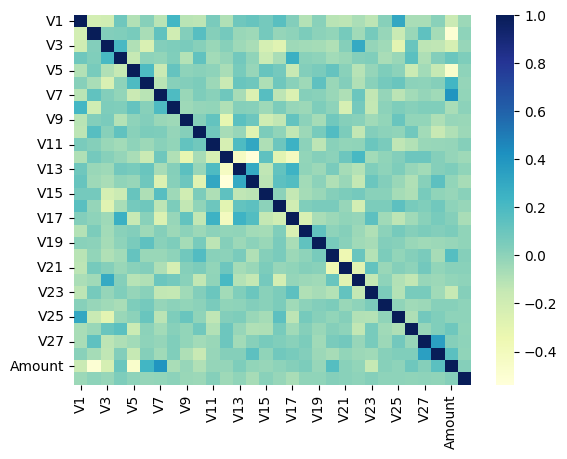

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu")
# displaying heatmap
plt.show()

**Checking for class distribution**

<Axes: xlabel='Class', ylabel='count'>

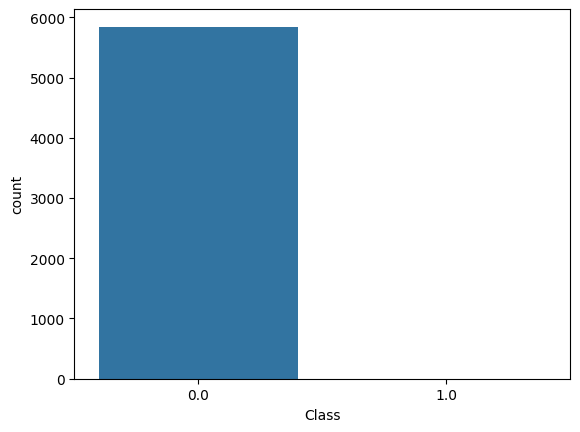

In [ ]:
sns.countplot(x="Class",data=data)

In [ ]:
(data["Class"].value_counts()/5848)*100

0.0    99.931601
1.0     0.051300
Name: Class, dtype: float64

**Highly imbalanced dataset with 99% of data as not fraud and only 0.17% of data was fraud**

In [ ]:
X= data.drop("Class",axis=1)
y=data["Class"]

**Oversampling**

In [ ]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

**Model Training**

In [ ]:
pickle.dump(lr, open('lr_model (auc = 0.99).pkl', 'wb'))